In [1]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
filename = 'scripts.csv'
scripts_dataframe = pd.read_csv(filename)

In [3]:
scripts_dataframe['wordcount'] = 0
for index, row in scripts_dataframe.iterrows():
#     print row['Character'], row['Dialogue']
    if type(row['Dialogue']) == str: 
        scripts_dataframe.loc[index,'wordcount'] = len(row['Dialogue'].split())
    else: 
        scripts_dataframe.loc[index,'wordcount'] = 1

In [4]:
numberSeasons = 9
characters = ['JERRY', 'GEORGE', 'ELAINE', 'KRAMER', 'MORTY', 
              'FRANK', 'PETERMAN', 'HELEN', 'SUSAN', 'NEWMAN']


In [5]:
iterables = [characters, range(numberSeasons)]
index = pd.MultiIndex.from_product(iterables, names=['character', 'season'])
wordCount_dataframe = pd.DataFrame(numpy.zeros((len(iterables[0]) * len(iterables[1]),2)), index=index)
wordCount_dataframe.columns=['wordcount', 'percentage']

In [6]:
seasonWordCount = numpy.zeros(9)
for index, row in scripts_dataframe.iterrows():
    character = row.loc['Character']
    season = numpy.int(row.loc['Season'])
    wordcount = row.loc['wordcount']
    seasonWordCount[season-1] += wordcount
    if character in characters:
        wordCount_dataframe.loc[character,season-1]['wordcount'] += wordcount

In [7]:
for character in characters:
    for season in range(numberSeasons):
        wordCount_dataframe.loc[character,season]['percentage'] = wordCount_dataframe.loc[character,season]['wordcount'] / wordCount_dataframe.xs(season, level='season')['wordcount'].sum()


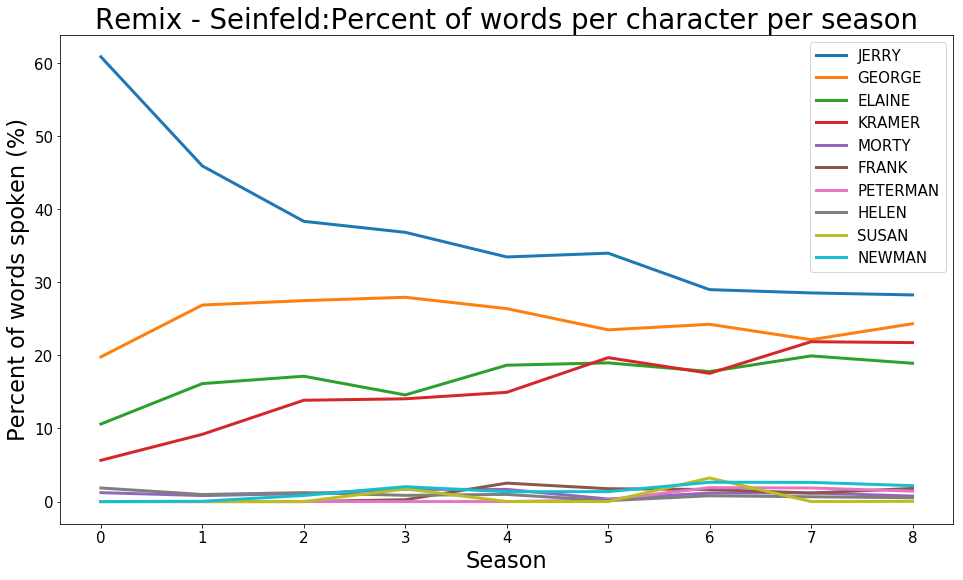

In [10]:
plt.figure(figsize=(16,9))
for character in characters:
    plt.plot(wordCount_dataframe.loc[character,:]['percentage'] * 100, label=character, linewidth=3)
plt.ylabel('Percent of words spoken (%)', fontsize=22.5)
plt.xlabel('Season', fontsize=22.5)
plt.title('Remix - Seinfeld:Percent of words per character per season', fontsize=27.5)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('percentWordSpoken.png', dpi=500)
